In [1]:
!pip install --upgrade xgboost scikit-learn

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 4.7/124.9 MB 23.8 MB/s eta 0:00:06
   -- ------------------------------------- 9.2/124.9 MB 22.9 MB/s eta 0:00:06
   ---- ----------------------------------- 13.6/124.9 MB 22.0 MB/s eta 0:00:06
   ----- ---------------------------------- 18.6/124.9 MB 22.6 MB/s eta 0:00:05
   ------- -------------------------------- 23.3/124.9 MB 22.4 MB/s eta 0:00:05
   -------- ------------------------------- 28.0/124.9 MB 22.5 MB/s eta 0:00:05
   ---------- ----------------------------- 33.0/124.9 MB 22.6 MB/s eta 0:00:05
   ----------- ---------------------------- 37.2/124.9 MB 22.1 MB/s eta 0:00:04
   ------------ --------------------------- 40.4/124.9 MB 21.4 MB/s eta 0:00:04
   -------------- ------------------------- 45.4/124.9 MB 21.5 MB/s eta 0:00:04
   ---------------- ----------------------- 50.3/124.9 MB 21.8 MB/s eta 0:00:04
   ----------------- ---------------------- 55.3/12

In [2]:
import matplotlib.pyplot as plt
import argparse
import numpy as np
from sklearn.datasets import load_breast_cancer # Dataset!
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_breast_cancer
from tabulate import tabulate

In [3]:
def plot_learning_curve(model: object, X_train: np.ndarray, y_train: np.ndarray, model_name: str) -> None:
    """
    This function is required to see how our algorithms train! Please do not alter this code in any way!
    """

    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs = -1, train_sizes = np.linspace(0.01,1.0,20),scoring = "accuracy"
    )

    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training accuracy')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Test accuracy')
    plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                     np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color='r')
    plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                     np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color='g')
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# 1) Ensemble Algorithms!


### Dataset for our Ensemble Algorithm:
Our dataset is the breast cancer dataset provided by the UC Irvine Machine Learning Repository. There are 569 instances filled with 30 features that contain continuous values.
 - radius
 - texture
 - perimeter
 - area
 - smoothness
 - .... 25 more

With this dataset, our main goal is to perform binary classification to determine whether or not a certain patient has breast cancer, which our model tries to predict by looking at the feature values.


### 1.1) Loading our Dataset

In [4]:
# Loading the dataset!
data = load_breast_cancer()

In [5]:
# Visualizing our dataset:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(tabulate(df.head(), headers='keys', tablefmt='grid'))

+----+---------------+----------------+------------------+-------------+-------------------+--------------------+------------------+-----------------------+-----------------+--------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+----------+
|    |   mean radius |   mean texture |   mean perimeter |   mean area |   mean smoothness |   mean compactness |   mean concavity |   mean concave points |   mean symmetry |   mean fractal dimension |   radius error |   texture error |   perimeter error |   area error |   smoothness error |   compactness error |   concavity error |   concave points error |   symmetry error 

### 1.2) Splitting our dataset

In [6]:
# Splitting the dataset into the input and output
X = data.data
y = data.target

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

### 1.3) Training our Models!

In [8]:
# Decision Tree Model
# TODO: Adjust the hyperparameters
decision_tree_model = DecisionTreeClassifier(
    max_depth = 5,      # Depth of Tree
    random_state = 2023148056)


# Random Forest Model
# TODO: Adjust the hyperparameters
random_forest_model = RandomForestClassifier(
    n_estimators = 500,       # Number of trees
    max_depth = 10,           # Depth of Trees
    random_state = 2023148056)

In [9]:
# The models that we will be looking at
models = {
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model
}

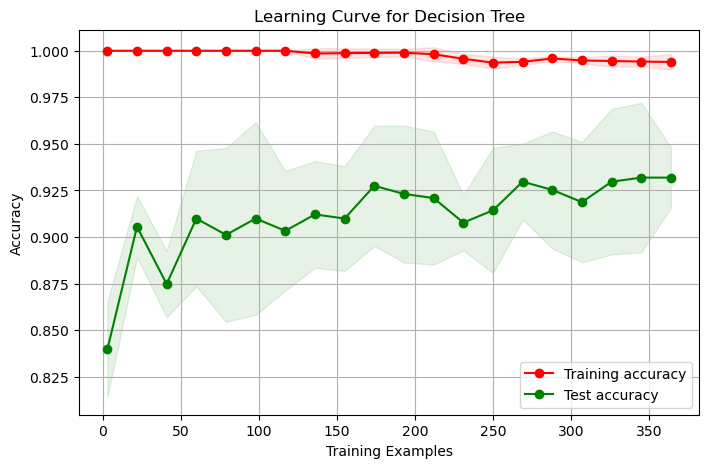

Decision Tree - Training Accuracy: 0.9934, Test Accuracy: 0.9123


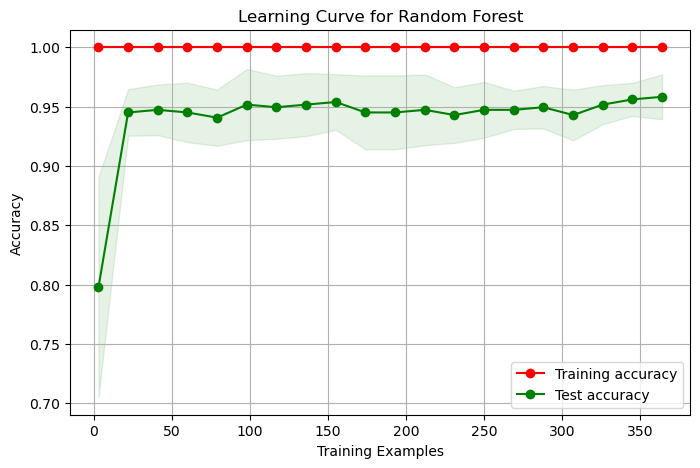

Random Forest - Training Accuracy: 1.0000, Test Accuracy: 0.9561


In [10]:
for model_name, model in models.items():
    """
    In the code below, you will be training the two models above!
    """
    plot_learning_curve(model, X_train, y_train, model_name)

    # TODO: Train the model and obtain our predictions for both our test and training set!
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # TODO: Acquire the accuracy scores!
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"{model_name} - Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# 2) Principal Component Analysis!
The main goal of this section is to implement your own Principal Component Analysis class in python. If implemented correctly, you will get similar results to that of the one provided by the Sklearn package.

### 2.1) Implementing your custom PCA model!

#### Explaining the dataset:
Dataset: UCI Irvine Machine Learning Repository Wine Dataset:
 - 3 different varieties of grapes
 - Contains 178 samples
 - 13 different numeric features
   - Alcohol
   - Malic Acid
   - Ash
   - Magnesium
   - .... and 9 more!
   
You will be using this dataset to perform PCA. If done properly, the 2 main principal components will effectively separate the three different varieties of grapes!

In [11]:
# Importing the necessary packages as well as our dataset
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA as SklearnPCA
from sklearn.preprocessing import StandardScaler

In [12]:
class CustomPCA:
    def __init__(self, n_components: int) -> None:
      """
      """
      self.n_components = n_components
      self.components_ = None
      self.mean_ = None

    def fit(self,X: np.ndarray) -> None:
      # 1. Center the Data:
      self.mean_ = np.mean(X, axis = 0)
      X_centered = X - self.mean_

      #2. TODO: Find the Covariance Matrix of X:
      covariance_matrix = np.cov(X_centered, rowvar=False)

      #3. TODO: Find the eigenvalues and eigenvectors!
      # HINT: numpy function computes the following!
      eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

      #4. TODO: Sort the eigenvectors and eigenvalues in descending order!
      # HINT: np.argsort
      sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
      eigenvalues = eigenvalues[sorted_indices]
      eigenvectors = eigenvectors[:, sorted_indices]

      #5. TODO: Selecting the top n_components
      self.components_ = eigenvectors[:, :self.n_components]

    def transform(self, X):
        """
        Projects the data into the principal components
        """
        X_centered = X - self.mean_
        return np.dot(X_centered, self.components_)

    def fit_transform(self, X):
        """
        Combines both fit and transform functions!
        """
        self.fit(X)
        return self.transform(X)

### 2.2) Loading the dataset

In [13]:
# Loading Wine Dataset
data = load_wine()
X = data.data
y = data.target
target_names = data.target_names

In [14]:
# Normalizing the dataset prior to applying PCA
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

### 2.3) Visualizing our Results!

In [15]:
# Sklearn PCA
sklearn_pca = SklearnPCA(n_components=2)
X_sklearn_transformed = sklearn_pca.fit_transform(X_normalized)

In [16]:
# Custom PCA
custom_pca = CustomPCA(n_components=2)
X_custom_transformed = custom_pca.fit_transform(X_normalized)

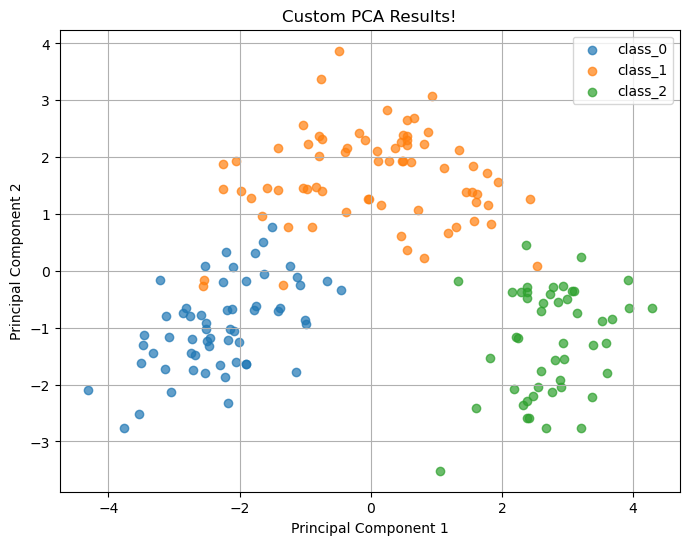

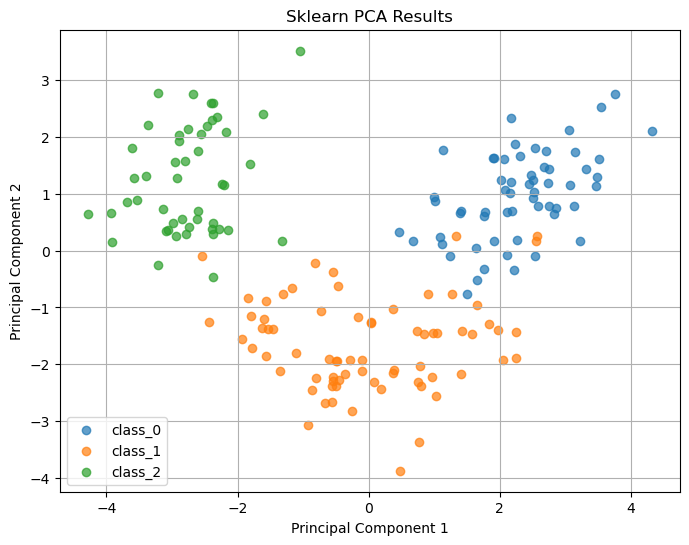

In [17]:
# Visualizing PCA Results
def plot_pca_results(X_transformed, y, target_names, title):
    plt.figure(figsize=(8, 6))
    for i, target_name in enumerate(target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            label=target_name,
            alpha=0.7
        )
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(title)
    plt.legend()
    plt.grid(True)

# Plot results for Custom PCA
plot_pca_results(X_custom_transformed, y, target_names, "Custom PCA Results!")

# Plot results for Sklearn PCA
plot_pca_results(X_sklearn_transformed, y, target_names, "Sklearn PCA Results")

# Show both plots
plt.show()

# 3) Support Vector Machine
In this particular section, we will be implementing your very own custom hard support vector machine!

#### Explaining the dataset:
Dataset: IRIS dataset provided by SKlearn, very commonly seen when using R!
- Classifying flowers into three difference species of Iris based on features
  - We're only going to implement binary SVM so we'll reduce the class by one!
- 150 Samples
- Features:
  - Sepal length
  - Sepal width
  - Petal length
  - Petal width
- We're only going to be using two features so that we can visualize the result of our SVM better!

In [18]:
from sklearn.datasets import load_iris

### 3.1) Custom SVM!

We are implementing a custom version of the subgradient form of the SVM and we are finding/updating its weights via gradient descent. To help guide you, I will give you the loss function here. The condition variable below has something to do with the righthand term! Depending on what you put as your condition, the number of lines you might need to code might differ!
$$
L(\mathbf{w}, b) = \lambda ||\mathbf{w}||^2 + \frac{1}{n} \sum_{i=1}^N \max(0, 1 - y_i (\mathbf{w} \cdot \mathbf{x}_i + b))
$$

In [24]:
class Custom_SVM:
    def __init__(self, learning_rate: float = 0.001, n_iter: int = 1000, lambda_param: float = 1e-4) -> None:
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.lambda_param = lambda_param
        self.w = None
        self.b = None


    def fit(self, X: np.ndarray, y:np.ndarray) -> None:
        """
        X: numpy array of shape (number of samples, number of features)
        y: numpy array of shape (number of samples,)
        This function is going to be used to update the weights
        to fit our hard margin support vector machine to our dataset!
        """
        # Get the shape of our X dataset
        n_samples, n_features = X.shape

        # TODO: Initializing the learnable parameters!
        self.w = np.zeros(n_features)
        self.b = 0

        # TODO: Updating the weights through gradient descent!
        for _ in range(self.n_iter):
            for i in range(n_samples):
                condition = y[i] * (np.dot(X[i], self.w) + self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(y[i], X[i]))
                    self.b -= self.learning_rate * y[i]

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        X: numpy array of shape (number of samples, number of features)
        output: numpy array of shape (number of samples,) that tells us the predicted labels based
        on our weights and data!
        HINT: np.sign
        """
        return np.sign(np.dot(X, self.w) + self.b)

### 3.2) Loading the dataset!

In [25]:
# Loading our Iris Dataset
data = load_iris()
X = data.data
y = data.target

In [26]:
# Selecting only two classes from this dataset
X = X[y != 2, :2]  # Only using two features for our particular example!
y = y[y != 2]

# Converting our labels to the format that the SVM needs to operate
y = np.where(y == 0, -1, 1)

In [27]:
# Initialize and train SVM
svm = Custom_SVM()
svm.fit(X, y)

# Making Predictions using our SVM
predictions = svm.predict(X)

### 3.3) Visualizing our results!

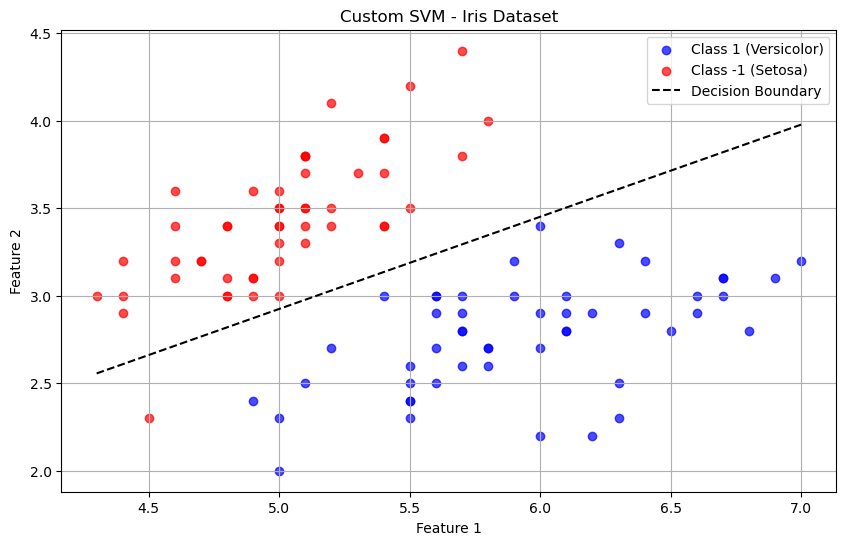

In [28]:
# Visualize the results
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b', label='Class 1 (Versicolor)', alpha=0.7)
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='r', label='Class -1 (Setosa)', alpha=0.7)

# Plot the decision boundary
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = -(svm.w[0] * x1 + svm.b) / svm.w[1]
plt.plot(x1, x2, color='k', linestyle='--', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Custom SVM - Iris Dataset')
plt.legend()
plt.grid()
plt.show()

Your result should look like the following!

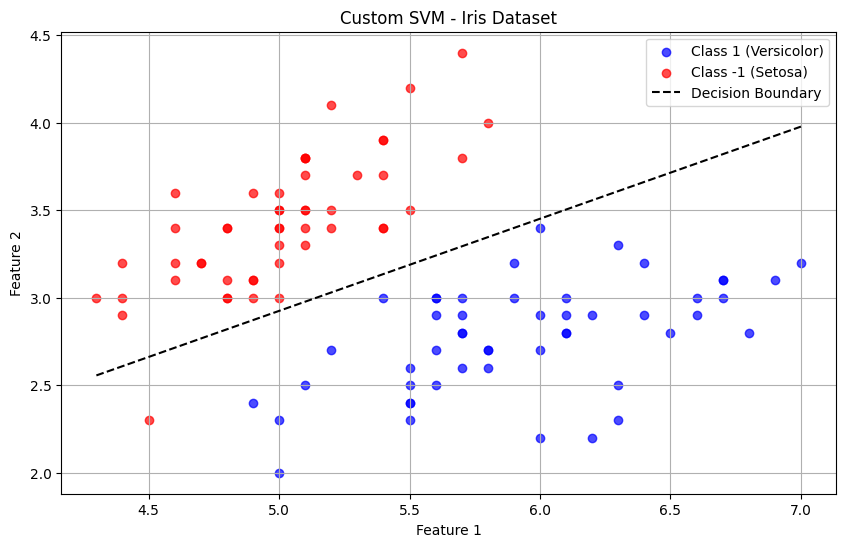